# Twitter
Twitter is a great way to engage your audience and get insights into what they're talking about. It's also an excellent way to grow your social network, gain fans and followers, and increase awareness of what you do. However we have noticed a popularity of fake twitter accounts that are created everyday. 

Fake tweeter accounts can be dangerous because they spread false information, hurt other people's feelings and may even lead to offline violence. In this project, we are going to investigate one fake tweeter account posts to see if they are a bully or not based on thier tweet messages

# Import libraries 

### Tweepy 
is an open source Python library that provides an easy way to extract data from Twitter. Tweepy wraps the Twitter API and makes it simple for Python developers living in the worlds greatest ecosystem for scientific computing to get real-time updates from they people you care about (not really😁, we dont care about this catfish account we are about to work on). 


In [6]:
pip install tweepy[async]

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install WordCloud

In [9]:
import tweepy 
from textblob import TextBlob
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import string
from advertools.emoji import extract_emoji
from wordcloud import WordCloud

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [10]:
df_train_set = pd.read_csv('tweetsc.csv')

In [11]:
df_train_set.head(3)

,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags
0,@MoeraneMK,M0de0 - ⚽,The vayolance we were dished today was excelle...,0,0,0,1655842442000,21 Jun 2022,MoeraneMK/status/1539340889306370048,https://twitter.com/hashtag/chrisExcel?src=has...,Samke | ChrisExcel
1,@Reatlegile1st,𝓡𝓮𝓪🦄,#chrisExcel #blem #Round2 #Samke reading from ...,1,0,2,1655924037000,22 Jun 2022,Reatlegile1st/status/1539683124019437568,https://twitter.com/hashtag/chrisExcel?src=has...,chrisExcel | blem | Round2 | Samke
2,@MBCNetworke,MBC Network,Azola Tabane popularly know as Chris Excel on ...,0,0,0,1655888248000,22 Jun 2022,MBCNetworke/status/1539533012941021189,https://twitter.com/hashtag/chrisExcel?src=has...,ChrisExcel | AzolaTabane | fearwomen | StateCa...


In [12]:
df_train_set['content']

0      The vayolance we were dished today was excelle...
1      #chrisExcel #blem #Round2 #Samke reading from ...
2      Azola Tabane popularly know as Chris Excel on ...
3      is there a job ticket and/or product in the bu...
4      #PrinceBenza ‘Wampona na’ single launch.Exclus...
                             ...                        
323        #ChrisExcel my girl awungizamele imali lapho.
324    Zazi Zithande Zinakekele #SirSboneloDee #BhutB...
325    Mmusi Maimane is still an agent . #DrMotsoaled...
326    ..security guards after hearing the masks are ...
327    What if these incidents, #EnyobeniTavern and #...
Name: content, Length: 328, dtype: object

# Data cleaning 

In [13]:
#Function to clean tweet messages 
def clean_tweets(tweets):
   tweets = re.sub(r'@[A-Za-z0-9]+','',tweets) # remove @ mentions
   tweets = re.sub(r'#', '', tweets)  # remove # symbols
   tweets = re.sub(r'RT[\s]+', '', tweets) # remove rt -retweet
   tweets = re.sub(r'https?:\/\/\S+','', tweets) # remove hyperlinks 
   tweets = re.sub(r'[,!?;-]+', '.', tweets) #Removing any remaining non-characters
   tweets = tweets.lower() # Change words to lower 
   tweets = tweets.translate(str.maketrans('','', string.punctuation)) # for removing punctuation marks

   return tweets

In [14]:
df_train_set['clean_content'] = df_train_set['content'].apply(clean_tweets)

In [15]:
df_train_set[['clean_content', 'content']].head(10)

,clean_content,content
0,the vayolance we were dished today was excelle...,The vayolance we were dished today was excelle...
1,chrisexcel blem round2 samke reading from the ...,#chrisExcel #blem #Round2 #Samke reading from ...
2,azola tabane popularly know as chris excel on ...,Azola Tabane popularly know as Chris Excel on ...
3,is there a job ticket andor product in the bui...,is there a job ticket and/or product in the bu...
4,princebenza ‘wampona na’ single launchexclusiv...,#PrinceBenza ‘Wampona na’ single launch.Exclus...
5,any approvalword re realpro proofveritable job,any approval/word re: realpro proof/veritable ...
6,what the frick is the status on national bus p...,"What ""the frick"" is the status on National Bus..."
7,when nozibele tried to mess with unozibele w...,When @ChrisExcel102 (Nozibele) tried to mess w...
8,i enjoyed my birthday 😊🥰🍾 chrisexcel,I enjoyed my birthday 😊🥰🍾 #Chrisexcel https://...
9,we need people like in this country shoot to k...,"We need people like in this country, shoot to ..."


We can see that we still have some emojis lurking in our data , lets define a funtion to extract emojis 

In [16]:
'''def remove_emojis(tweet_msgs):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", re.UNICODE)
    tweet_msgs = re.sub(emoj, '', tweet_msgs)
    return tweet_msgs
'''

'def remove_emojis(tweet_msgs):\n    emoj = re.compile("["\n        u"😀-🙏"  # emoticons\n        u"🌀-🗿"  # symbols & pictographs\n        u"🚀-\U0001f6ff"  # transport & map symbols\n        u"\U0001f1e0-🇿"  # flags (iOS)\n        u"─-⯯"  # chinese char\n        u"✂-➰"\n        u"✂-➰"\n        u"Ⓜ-🉑"\n        u"🤦-🤷"\n        u"𐀀-\U0010ffff"\n        u"♀-♂" \n        u"☀-⭕"\n        u"\u200d"\n        u"⏏"\n        u"⏩"\n        u"⌚"\n        u"️"  # dingbats\n        u"〰"\n        "]+", re.UNICODE)\n    tweet_msgs = re.sub(emoj, \'\', tweet_msgs)\n    return tweet_msgs\n'

In [17]:
df_train_set.head(10)

,handle,name,content,replies,retweets,favorite,unix_timestamp,date,url,search_url,hashtags,clean_content
0,@MoeraneMK,M0de0 - ⚽,The vayolance we were dished today was excelle...,0,0,0,1655842442000,21 Jun 2022,MoeraneMK/status/1539340889306370048,https://twitter.com/hashtag/chrisExcel?src=has...,Samke | ChrisExcel,the vayolance we were dished today was excelle...
1,@Reatlegile1st,𝓡𝓮𝓪🦄,#chrisExcel #blem #Round2 #Samke reading from ...,1,0,2,1655924037000,22 Jun 2022,Reatlegile1st/status/1539683124019437568,https://twitter.com/hashtag/chrisExcel?src=has...,chrisExcel | blem | Round2 | Samke,chrisexcel blem round2 samke reading from the ...
2,@MBCNetworke,MBC Network,Azola Tabane popularly know as Chris Excel on ...,0,0,0,1655888248000,22 Jun 2022,MBCNetworke/status/1539533012941021189,https://twitter.com/hashtag/chrisExcel?src=has...,ChrisExcel | AzolaTabane | fearwomen | StateCa...,azola tabane popularly know as chris excel on ...
3,@ChrisExcel,Chris,is there a job ticket and/or product in the bu...,0,0,0,1236883770000,12 Mar 2009,ChrisExcel/status/1317536598,https://twitter.com/chrisExcel?lang=en,NaN,is there a job ticket andor product in the bui...
4,@PropagandaPTA,Propaganda Pretoria,#PrinceBenza ‘Wampona na’ single launch.Exclus...,0,8,18,1655969703000,23 Jun 2022,PropagandaPTA/status/1539874663224020993,https://twitter.com/hashtag/chrisExcel?src=has...,PrinceBenza | Samke | ChrisExcel | COVID19 | P...,princebenza ‘wampona na’ single launchexclusiv...
5,@ChrisExcel,Chris,any approval/word re: realpro proof/veritable ...,0,0,0,1236801163000,11 Mar 2009,ChrisExcel/status/1312318219,https://twitter.com/chrisExcel?lang=en,NaN,any approvalword re realpro proofveritable job
6,@ChrisExcel,Chris,"What ""the frick"" is the status on National Bus...",0,0,0,1236789074000,11 Mar 2009,ChrisExcel/status/1311352415,https://twitter.com/chrisExcel?lang=en,NaN,what the frick is the status on national bus p...
7,@Zane_bu,♐ZANE_BU♑,When @ChrisExcel102 (Nozibele) tried to mess w...,0,0,0,1655898069000,22 Jun 2022,Zane_bu/status/1539574208824573953,https://twitter.com/hashtag/chrisExcel?src=has...,Samke | Twar | ChrisExcel,when nozibele tried to mess with unozibele w...
8,@AnnzoThe1st,Annzo,I enjoyed my birthday 😊🥰🍾 #Chrisexcel https://...,0,0,3,1655892245000,22 Jun 2022,AnnzoThe1st/status/1539549778635370497,https://twitter.com/hashtag/chrisExcel?src=has...,Chrisexcel,i enjoyed my birthday 😊🥰🍾 chrisexcel
9,@press9919,REP🅾️RTER,"We need people like in this country, shoot to ...",2,2,17,1655956726000,23 Jun 2022,press9919/status/1539820233917190145,https://twitter.com/hashtag/chrisExcel?src=has...,round2 | Chrisexcel | earthquake | Matenas | S...,we need people like in this country shoot to k...


# Subjectivity

In [18]:
def get_subjectivity(tweet_text):
    return TextBlob(tweet_text).sentiment.subjectivity

# Polarity

In [19]:
def get_polarity(tweet_text):
    return TextBlob(tweet_text).sentiment.polarity

### Create subjectivity and polarity columns 

In [20]:
df_train_set['Subjectivity'] = df_train_set['clean_content'].apply(get_subjectivity)

In [21]:
df_train_set['Polarity'] = df_train_set['clean_content'].apply(get_polarity)

In [22]:
df_train_set[['clean_content','Subjectivity','Polarity']].head()

,clean_content,Subjectivity,Polarity
0,the vayolance we were dished today was excelle...,0.750000,0.500000
1,chrisexcel blem round2 samke reading from the ...,0.700000,0.125000
2,azola tabane popularly know as chris excel on ...,0.900000,0.600000
3,is there a job ticket andor product in the bui...,0.000000,0.000000
4,princebenza ‘wampona na’ single launchexclusiv...,0.407143,0.314286


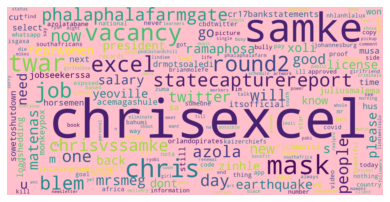

In [23]:
# check how well the sentiments are distributed 
#lets visualise using the word cloud

allWords = " ".join([twts for twts in df_train_set['clean_content']])

wordcloud = WordCloud(width = 2000, height = 1000, random_state=42,collocations=False, background_color="pink").generate(allWords)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [24]:
# function to get the negative , Neutral, positive analysis

def get_analysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return "Neutral"
    else :
        return "Positive"


In [25]:
# Create a new column with the scores 
df_train_set['Analysis'] = df_train_set['Polarity'].apply(get_analysis)

In [26]:
df_train_set[['clean_content','Subjectivity','Polarity', 'Analysis']].head(10)

,clean_content,Subjectivity,Polarity,Analysis
0,the vayolance we were dished today was excelle...,0.750000,0.500000,Positive
1,chrisexcel blem round2 samke reading from the ...,0.700000,0.125000,Positive
2,azola tabane popularly know as chris excel on ...,0.900000,0.600000,Positive
3,is there a job ticket andor product in the bui...,0.000000,0.000000,Neutral
4,princebenza ‘wampona na’ single launchexclusiv...,0.407143,0.314286,Positive
5,any approvalword re realpro proofveritable job,0.000000,0.000000,Neutral
6,what the frick is the status on national bus p...,0.000000,0.000000,Neutral
7,when nozibele tried to mess with unozibele w...,0.287500,-0.037500,Negative
8,i enjoyed my birthday 😊🥰🍾 chrisexcel,0.700000,0.500000,Positive
9,we need people like in this country shoot to k...,1.000000,0.000000,Neutral


In [27]:
#print all positive tweets 
j = 1
sorted_df = df_train_set.sort_values(by = ['Polarity'])
for i in range (0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Positive'):
        print(str(j)+ ')' + sorted_df['clean_content'][i])
        print()
        j = j+1

1)the vayolance we were dished today was excellent not even netflix could come up with such content 👌🏾 👌🏾 👌🏾 samke 🆚 chrisexcel twar 

2)chrisexcel blem round2 samke reading from the whole story that chris postedi’m not on anyone’s sidebut there are people like me who just feel sorry that samke had to go through the whole thing during her childhood times💔sorry you had to hustle 4 ur own life 

3)azola tabane popularly know as chris excel on twitter humiliated by a porn star  chrisexcel azolatabane  number 11  cr17bankstatements  lindiwe sisulu  fearwomen  yeoville  statecapturereport  

4)princebenza ‘wampona na’ single launchexclusive nights to rememberhome of the good life book now ⭐️ 7 star facility  thur 23 june 2022 🎧 🎧 🎧sa 🎧ajazz 🎧za  samke chrisexcel covid19 propagandapta t1flavv 

5)i enjoyed my birthday 😊🥰🍾 chrisexcel 

6)samke chrisexcel blem honestly anc is busy with statecapturereport statecapture phalaphalafarmgate phalaphalafarm yet young people are swimming in unemployme

In [28]:
#print all negative tweets 
j = 1
sorted_df = df_train_set.sort_values(by = ['Polarity'])
for i in range (0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Negative'):
        print(str(j)+ ')' + sorted_df['clean_content'][i])
        print()
        j = j+1

1)when  nozibele tried to mess with  unozibele was obliterated🤣🤣🤣 twitter is a wild space samke twar chrisexcel 

2)under the power vested on me by the black twitter constitution i hereby declare round 2 gathered information your favourite pornster and the side she doesn’t want the public to know about her 

3) it is not my role to expose the fake people in due time they will expose themselves for who they really are… 🤣🤣🤣🤣🤣 chrisexcel umjolowithazola peaceandlove relationshipadvice relationshipgoals 

4)revoshots meet world world meet revoshots a 360 video booth service for all your events based in gp let’s give your event an all round experience✨ insta  whatsapp 084 975 5337 girltalkza richmnisi juliusmalema chrisexcel samke 

5)hus has new postage statementamount  200 less than estimate

6)hus select is an occupant list ill delete 250 random records for deletion

7)dont be afraid to do the right thing thuli earthquake mrsmeg richmnisi chrisvssamke chrisexcel twar discorddown fearwome

In [29]:
#print all Nuetral tweets 
j = 1
sorted_df = df_train_set.sort_values(by = ['Polarity'])
for i in range (0, sorted_df.shape[0]):
    if (sorted_df['Analysis'][i] == 'Neutral'):
        print(str(j)+ ')' + sorted_df['clean_content'][i])
        print()
        j = j+1

1)is there a job ticket andor product in the building it doesnt go on the schedule until pieces are here

2)any approvalword re realpro proofveritable job

3)what the frick is the status on national bus postcardmetallic ink folks

4)we need people like in this country shoot to kill and eliminate criminals as soon as possible round2 chrisexcel earthquake matenas statecapturereport 

5)update on coach pitso  via      chrisexcel nhlanhlalux mathoho royalam samke

6)en ek wonder wanneer ons ooit gaan verander verander lewe onder die vrees totdat niks anders oorbly nie ons hoef nie die pad te ken nie al wat ons wil hê is die lewe daarbuite expressoshow 🤠samke 😎 chrisexcel 🇿🇦sowetoshutdown

7)can you move out before the lease has expired if you have valid reasons bahumi matennas chrisexcel

8)le weather yakuthola ungekho approved for finance ye moto socula ama gugu kini 🥶 musa round2 fraser chrisexcel masks

9)sowetoshutdown chrisexcel 

10)imagine bashing huns daily kanti udla imali ye pros

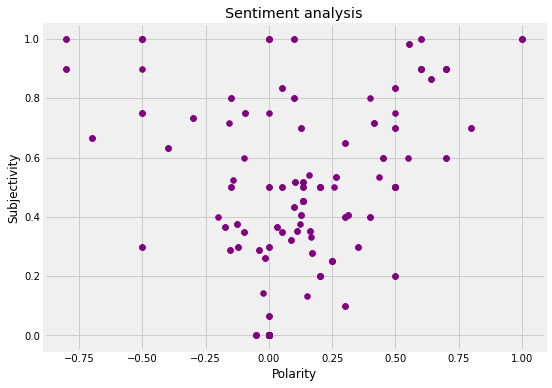

In [30]:
# plot the popularity and subjectivity
plt.figure(figsize = (8,6))
for i in range(0, df_train_set.shape[0]):
   plt.scatter(df_train_set['Polarity'][i], df_train_set['Subjectivity'][i], color = 'Purple')
plt.title('Sentiment analysis')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

In [31]:
#get the percentage of all the positive tweets
P_ = df_train_set[df_train_set.Analysis == 'Positive']
P_ = P_['clean_content']

round((P_.shape[0] / df_train_set.shape[0])* 100, 1)

33.2

In [32]:
#get the percentage of all the positive tweets
neg_ = df_train_set[df_train_set.Analysis == 'Negative']
neg_ = neg_['clean_content']

round((neg_.shape[0] / df_train_set.shape[0])* 100, 1)

14.9

In [33]:
#get the percentage of all the positive tweets
ntrl = df_train_set[df_train_set.Analysis == 'Neutral']
ntrl = ntrl['clean_content']

round((ntrl.shape[0] / df_train_set.shape[0])* 100, 1)

51.8

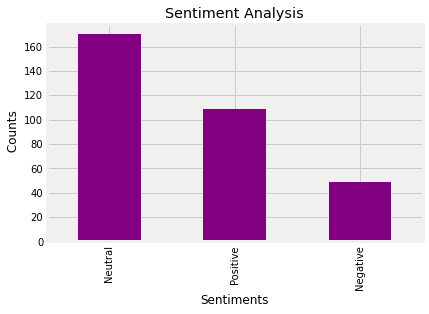

In [34]:
# value counts
df_train_set['Analysis'].value_counts()

#plot and visualize
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel(' Counts')
df_train_set['Analysis'].value_counts().plot(kind= 'bar', color = 'purple')
plt.show()

By the look of the things , The tweets from chris and those about cris are mostly nuetral. However if we do more cleaning we moght get diferent results.

In [35]:
#https://github.com/tweepy/tweepy